#  Titanic Survival Prediction at Beginner Level

A Kaggle Competition use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**The Challenge**

* The sinking of the Titanic is one of the most infamous shipwrecks in history.
* On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Contents**



Some important Libraries that are needed


*   Pandas: Data Manipulation and Analysis
*   Numpy: to work with ndarrays, linear algebra, reshaping, array indexing,etc

*   Matplotlib: Data Visualization
*   sklearn: statistical modelling including classification, regression,  clustering and dimensionality reduction






In [85]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


We are going to upload train.csv file and test.csv files respectively

In [86]:
#Upload CSV files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [87]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Assign it to respective DataFrame 

In [5]:
print("Dimensions of train: {}".format(train_df.shape))
print("Dimensions of test: {}".format(test_df.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [ ]:
#We can see that in train_df we are provided with the Survived Column, whereas test_df doesnt give us survival column

In [ ]:
#  https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 


# Exploratory Data Analysis

In [6]:
#Data Exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects

In [ ]:
#Please see Data Dictionary given on the Kaggle website, 
 

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barber, Miss. Ellen ""Nellie""",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#It can be observed that 38% survived.

In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#From train dataset it is observed that it contains different types of data such as numeric data, categorical, continous, missing/NaN values, which need to be taken care of
train_df.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
#Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
#Categorical Features: Survived, Sex, Embarked, Pclass
#Alphanumeric Features: Ticket, Cabin

In [9]:
#In the above section, we can observe many NaN, we will try to summarize them

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#But from above missing data analysis , some data rows of Fare are empty.
#So we need to fill whose empty rows before doing computation.

all_df = [train_df, test_df]

for data in all_df:
  data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [11]:
train_df['category_fare'] = pd.qcut(train_df['Fare'], 4)
print( train_df[["category_fare","Survived"]].groupby(["category_fare"], as_index = False).mean() )

     category_fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [ ]:
#Let us talk about some Relationships present in the table

In [ ]:
#From train_df table it is evident that mostly females survived compared to men, therefore we will take into consideration Sex column, Age column, pclass column 


#https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

#train_df.groupby('Sex')[['Survived']].mean()

In [ ]:
# 3 of every 4 females Survived

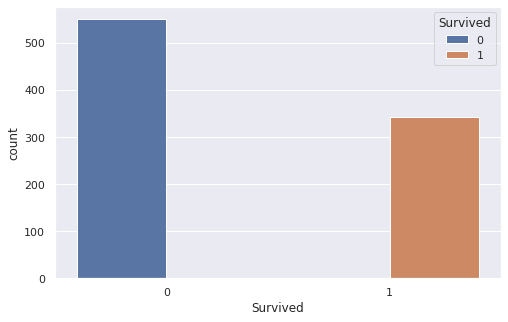

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 5))
ax= sns.countplot(x='Survived', hue="Survived", data=train_df)


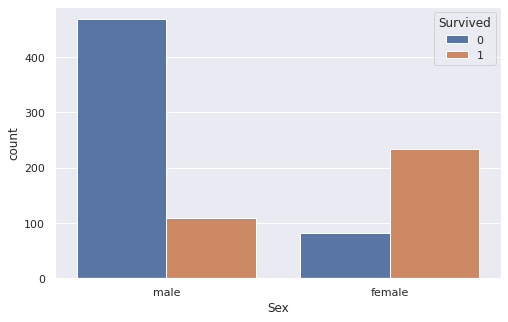

In [13]:
plt.figure(figsize = (8, 5))
ax= sns.countplot(x='Sex', hue="Survived", data=train_df)


In [ ]:
#Pclass vs Survived


In [14]:
#https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/

#By using heatmap
group = train_df.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()

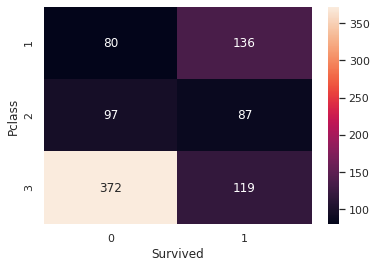

In [15]:
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

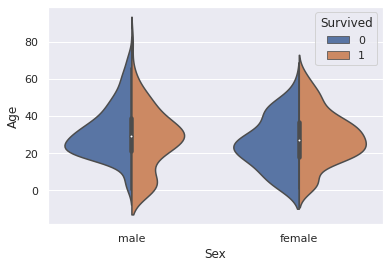

In [16]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = train_df, split = True)

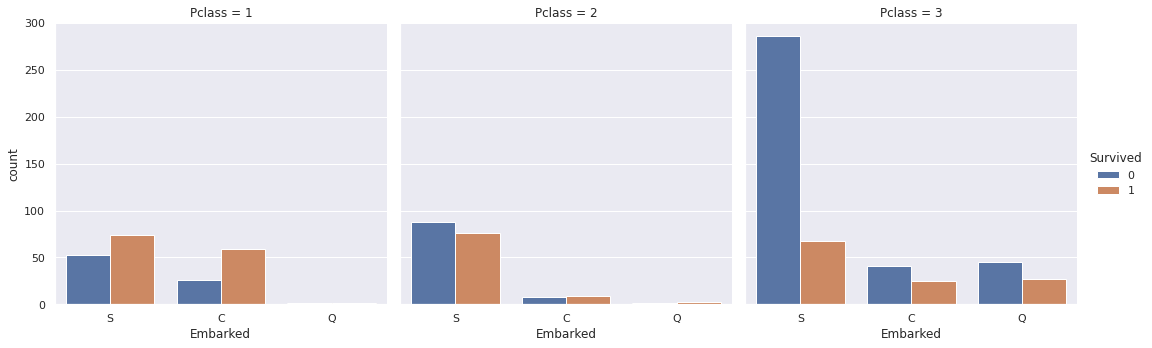

In [17]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = train_df) 

In [18]:
#Sibsp + Parch + Family, make them into Family COlumn
all_df = [train_df, test_df]

for i in all_df:
  i['Family'] = i['SibSp'] + i['Parch'] + 1


In [19]:
all_df = [train_df, test_df]

for data in all_df:
  data['IsAlone'] = 0
  data.loc[data['Family'] == 1, 'IsAlone'] = 1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


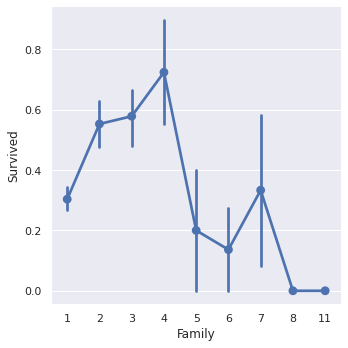

In [20]:
# Factorplot for Family_Size 
sns.factorplot(x ='Family', y ='Survived', data = train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


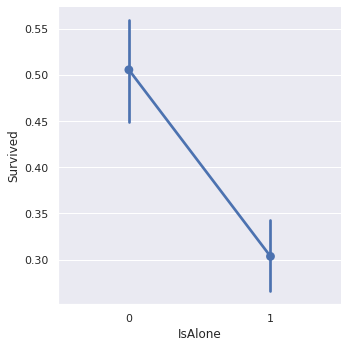

In [21]:
# Factorplot for Alone 
sns.factorplot(x ='IsAlone', y ='Survived', data = train_df)


In [ ]:
#Family of four has more chance of survival than being alone or having more that 5 or 6 members of family.


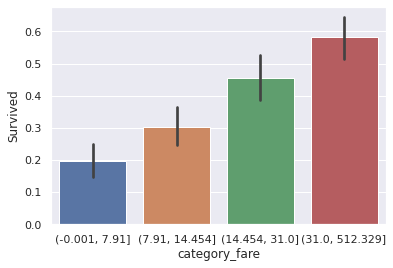

In [22]:
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='category_fare', y ='Survived',  data = train_df) 

In [ ]:
#It gives us idea about separating the af

In [ ]:
#Females were most lived then men, lets check in percentages

In [23]:
print( train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [ ]:
#It can be seen that people from higher class had more survival chance., lets check in percentages

In [24]:
print( train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [25]:
print( train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean() )

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [26]:
print( train_df[["Family","Survived"]].groupby(["Family"], as_index = False).mean() )

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [ ]:
#Let us check on Survived and not survived


In [ ]:
# Another way for visualization

#plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
#sns.countplot(train_df.Survived)
#plt.title('Number of passenger Survived');

#plt.subplot(1,2,2)
#sns.countplot(x="Survived", hue="Sex", data=train_df)
#plt.title('Number of passenger Survived');


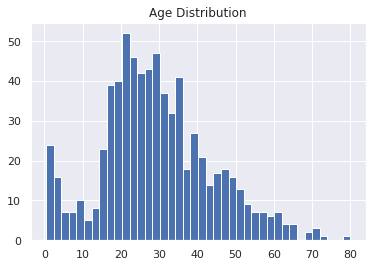

In [27]:
#Let us explore age column more

train_df['Age'].hist(bins=40)
plt.title('Age Distribution');

In [ ]:
https://towardsdatascience.com/your-first-kaggle-competition-submission-64da366e48cb

In [ ]:
https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

In [ ]:
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

# Remove Features/Columns which are not required(revise titel)

In [28]:
#It can be seen that, Age, Cabin and Embarked have some NaN values
#Cabin has more than 75% missing values, so it would be wise to drop it.

train_df = train_df.drop(['Cabin'], axis = 1)

In [29]:
test_df = test_df.drop(['Cabin'], axis = 1 )

In [30]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [31]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,category_fare,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(7.91, 14.454]",1,1


In [32]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0


In [33]:
#Still we have missing values in Embarked and Age

#Let us first see how many Embarked values are missing
train_df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
category_fare      0
Family             0
IsAlone            0
dtype: int64

In [34]:
print("Southampton(S):")
southampton = train_df[train_df['Embarked'] == 'S'].shape[0]
print(southampton)

print("Cherbourg(C):")
cherbourg = train_df[train_df['Embarked'] == 'C'].shape[0]
print(cherbourg)

print("Queenstown(Q):")
queenstown = train_df[train_df['Embarked'] == 'Q'].shape[0]
print(queenstown)

Southampton(S):
644
Cherbourg(C):
168
Queenstown(Q):
77


In [ ]:
#It can be observed that most people boarded from Southampton

In [35]:
#replacing the missing values in the Embarked feature with S
train_df = train_df.fillna({"Embarked": "S"})

In [36]:
#Creating new feature extracting from existing

#Age, title and Survival have correlation in between them
#For Ex Master title has Age mean of 5 years.
#So now we are going to extract the titles from Name

all_df = [train_df, test_df]
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for i in all_df:
  i['Title'] = i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  i['Title'] = i['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major', 'Rev','Sir','Jonkheer','Dona'], 'Rare')
  i['Title'] = i['Title'].replace('Mlle', 'Miss')
  i['Title'] = i['Title'].replace('Ms', 'Miss')
  i['Title'] = i['Title'].replace('Mme', 'Mrs')
  # convert titles into numbers
  i['Title'] = i['Title'].map(titles)
  # filling NaN with 0, to get safe
  i['Title'] = i['Title'].fillna(0)



In [37]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [38]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [39]:
#Convert Sex column to Numerics
#Mapping Sex Column
all_df = [train_df, test_df]
gender = {"male":0, "female":1}

for i in all_df:
  i["Sex"] = i["Sex"].map(gender).astype(int)

In [40]:
#Convert all Port names to Numeric Form
#Mapping Embarked
all_df = [train_df, test_df]
port = {'S':0, 'C':1, 'Q':2}

for i in all_df:
  i['Embarked'] = i['Embarked'].map(port)

In [ ]:
#Handling Continous Data in Age and Fare
#Divide these 2 columns into groups so that continuous value(float) are converted into integer values

In [41]:
#Mapping Fare
all_df = [train_df, test_df]

for i in all_df:
  i.loc[i['Fare'] <= 7.91, 'Fare'] = 0
  i.loc[(i['Fare'] > 7.91) & (i['Fare'] <= 14.45), 'Fare'] = 1
  i.loc[(i['Fare'] > 14.45) & (i['Fare'] <= 31), 'Fare'] = 2
  i.loc[i['Fare'] > 31, 'Fare'] = 3
  i['Fare'] = i['Fare'].astype(int)


In [42]:
train_df =train_df.drop(['category_fare'], axis =1)

In [ ]:
#Working with Age

In [43]:
#Replacing missing value with mean
all_df = [train_df, test_df]

for i in all_df:
  i['Age'] = i['Age'].replace(np.NaN, i['Age'].mean())

In [ ]:
#train_df['category_age'] = pd.qcut(train_df['Age'], 4)
#print( train_df[["category_age","Survived"]].groupby(["category_age"], as_index = False).mean() )

In [ ]:
#Convert float to int 
#use pd.cut
#Finally do mapping and remove the redundant column


In [44]:
train_df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
all_df = [train_df, test_df]

for data in all_df:
  data['Age'] = data['Age'].astype(int)
  data.loc[data['Age'] <= 16, 'Age']                        = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
  data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
  data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
  data.loc[data['Age'] > 64, 'Age']                        = 4

In [46]:
#Let us see its distribution
train_df['Age'].value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

In [ ]:
#Try to add new features if possible

In [47]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
#It can be seen that Alone survive more than people who have family

In [48]:
train_df.head(11)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,Title
0,1,0,3,0,1,1,0,0,0,2,0,1
1,2,1,1,1,2,1,0,3,1,2,0,3
2,3,1,3,1,1,0,0,1,0,1,1,2
3,4,1,1,1,2,1,0,3,0,2,0,3
4,5,0,3,0,2,0,0,1,0,1,1,1
5,6,0,3,0,1,0,0,1,2,1,1,1
6,7,0,1,0,3,0,0,3,0,1,1,1
7,8,0,3,0,0,3,1,2,0,5,0,4
8,9,1,3,1,1,0,2,1,0,3,0,3
9,10,1,2,1,0,1,0,2,1,2,0,3


In [49]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,Title
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,2,0,3
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,0,3


In [50]:
train_df = train_df.drop(['SibSp','Parch'], axis = 1)
test_df = test_df.drop(['SibSp','Parch'], axis = 1)

In [51]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

In [ ]:
https://www.kaggle.com/soham1024/titanic-data-science-eda-with-meme-solution

In [ ]:
https://www.kaggle.com/startupsci/titanic-data-science-solutions

# Building Models

In [52]:
X_train = train_df.drop(['PassengerId', 'Survived'], axis= 1)
y_train = train_df['Survived']

In [53]:
X_test = test_df.drop(['PassengerId'], axis = 1)

In [54]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 81.48


In [55]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Accuracy:",acc_knn)

KNN Accuracy: 85.63


In [56]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train) * 100, 2)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 88.78


In [74]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train, y_train) * 100, 2)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 88.78


In [58]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree'],
    'Score' : [acc_log, acc_knn, acc_dt, acc_rf]
})

In [59]:
models.sort_values(by = 'Score', ascending= False)

,Model,Score
2,Random Forest,88.78
3,Decision Tree,88.78
1,KNN,85.63
0,Logistic Regression,81.48


In [ ]:
#It can be observed that Random Forest performed excellently

In [ ]:
#K-Fold Cross Validation to validate a models performance


In [72]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = 'accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.86516854 0.74157303 0.84269663 0.84269663 0.82022472
 0.83146067 0.78651685 0.86516854 0.84269663]
Mean: 0.823820224719101
Standard Deviation: 0.03644608527229354


In [75]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,2)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.25
Sex,0.21
Family,0.13
Pclass,0.12
Fare,0.10
Age_Class,0.08
Embarked,0.06
Age,0.04
IsAlone,0.02


In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[488,  61],
       [101, 241]])

In [82]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7980132450331126
Recall: 0.7046783625730995


In [83]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.748447204968944

# Creating Submission File

In [ ]:
#Create csv file to save results
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('submission.csv', index = False)